In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman.csv


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Information of Haberman's dataset

1. Total number of observations: 304
2. Total number of features: 4 [Age, Year, Node, Status]
3. Feature information:

    a. Age of the patient at the time of operation (numerical)

    b. Patient's year of operation (numerical)

    c. Number of positive axillary nodes detected (numerical)

    d. Survival status (class attribute) : 1 = the patient survived 5 
    years or longer and 2 = the patient died within 5 year

####Reading the dataset

In [4]:
data=pd.read_csv('haberman.csv')

#number of datapoints avaliable for the analysis
print(data.shape)

#name of the columns in the given dataset
print(data.columns)

print(data.head())

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [5]:
#Checking whether the dataset is balanced or imbalanced with respect to target variable(status)
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

####Information about the dataset

In [6]:
#Information regarding the dataset
print(data.info())
print('------------------------------------------')

#Checking whether dataset contain any 'NaN' Values 
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
------------------------------------------
age       0
year      0
nodes     0
status    0
dtype: int64


In [7]:
#Converting the target variable into categorical (1: Yes , 2: No) for better visualization
data['status']=data['status'].map({1:'Yes', 2:'No'}).astype('category')

#Overview of the dataset
print(data.describe())

              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


#####Overview of Habermans dataset statistics
1. The patients are with in age group 30 to 83 lowest being 30, heighest being 83. The mean age of patient is 53
3. The first operation on the patient has been carried out in the year 1958 and the latest was in the year 1969
4. 75% of the patients are under 60 age group and are operated before 1966
5. The maximum number of nodes obeserved in a single patient is 52 and the minimum is 0
6. It was observed that about 25% of patients have no nodes, 75% of the patients have only 4 nodes and it was found that there are patients with 52 nodes which is quite non comparable that lead mean to shift drastically. 


###Univariate Analysis of the features using Histogram, boxplots, CDF, PDF, Vilion Plots

In [8]:
status_yes = data[data['status'] == 'Yes']
status_no = data[data['status'] == 'No']

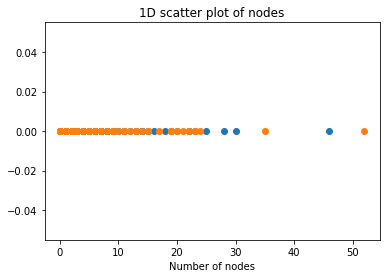

In [9]:
plt.plot(status_yes['nodes'], np.zeros_like(status_yes['nodes']), 'o')
plt.plot(status_no['nodes'], np.zeros_like(status_no['nodes']), 'o')
plt.title('1D scatter plot of nodes')
plt.xlabel('Number of nodes')
plt.show()

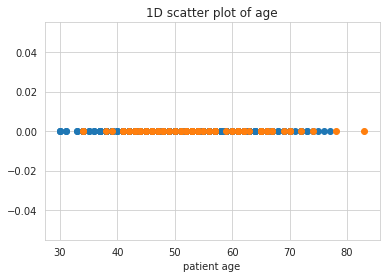

In [168]:
plt.plot(status_yes['age'], np.zeros_like(status_yes['age']), 'o')
plt.plot(status_no['age'], np.zeros_like(status_no['age']), 'o')
plt.title('1D scatter plot of age')
plt.xlabel('patient age')
plt.show()

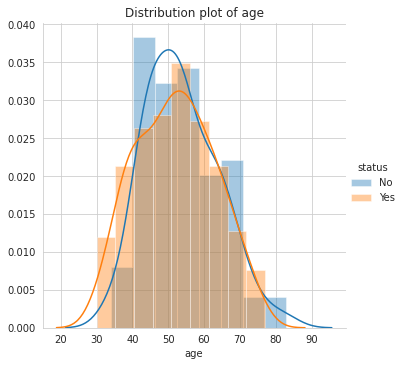

In [163]:
sns.FacetGrid(data, hue = 'status',size=5).map(sns.distplot, 'age').add_legend()
plt.title('Distribution plot of age')
plt.show()

From the above PDF of patients age, it is very hard to interpret the result, as the distribution of survived patients more than 5 years is almost overlapping with the survived patients less than 5 years. Thereby age is not a good feature to make any conclusions.

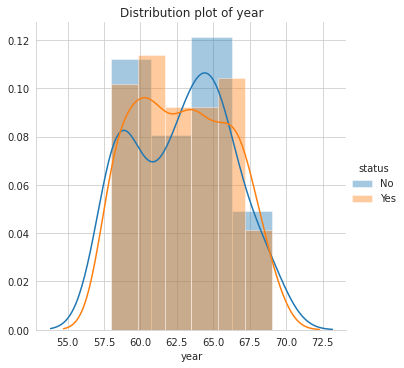

In [162]:
#sns.FacetGrid(data, row = 'status',size=5).map(sns.distplot, 'year').add_legend()
sns.FacetGrid(data, hue = 'status',size=5).map(sns.distplot, 'year').add_legend()
plt.title('Distribution plot of year')
plt.show()

The PDF of years also doesn't give any conclusion as distribution of both survived patients more than 5 years and unsurvived patients less 5 years have same distribution. Therefore, year is also not a good feature to draw any conclusions

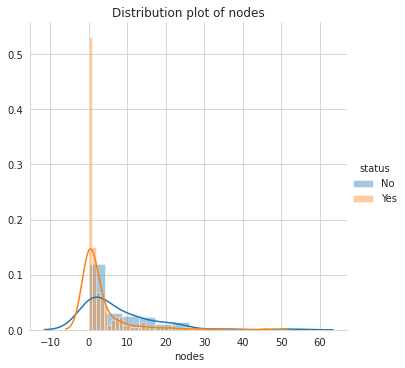

In [164]:
#sns.FacetGrid(data, row = 'status',size=5).map(sns.distplot, 'nodes').add_legend()
sns.FacetGrid(data, hue = 'status',size=5).map(sns.distplot, 'nodes').add_legend()
plt.title('Distribution plot of nodes')
plt.show()

Although the distribution are same but it is quite good feature when compared to features like **age and year**. The survival rate is more, when nodes are less than 4. Thereafter the survival rate decreses with increase of nodes. It is quite suprising that, in case of unsurvived patients as number of nodes increases the percentage of patients unsurvived patients decreses [**opposite trend to survived patients**]

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


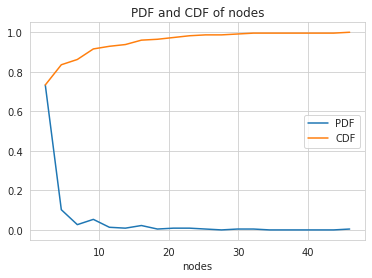

In [158]:
#Plot PDF and CDF of nodes
#PDF
counts, bins = np.histogram(status_yes['nodes'], bins=20, density = True)  #https://www.geeksforgeeks.org/numpy-histogram-method-in-python/
pdf = counts/(sum(counts))                                                      # np.histogram gives two outputs counts, bins
print(pdf)
print(bins)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)
plt.xlabel("nodes")
plt.legend(['PDF','CDF'])
plt.title('PDF and CDF of nodes')
plt.show()

It is quite clear that almost 75% of survived patients are having nodes less than 5(approxmately). The patients with 15 or more nodes have very less survival rate.  

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


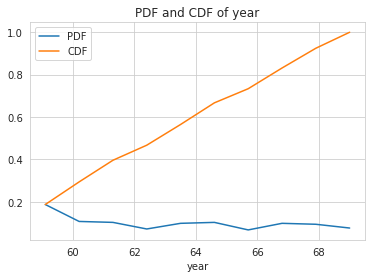

In [161]:
#Plot PDF and CDF of years
#PDF
counts, bins = np.histogram(status_yes['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bins)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)
plt.xlabel("year")
plt.legend(['PDF','CDF'])
plt.title('PDF and CDF of year')
plt.show()

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


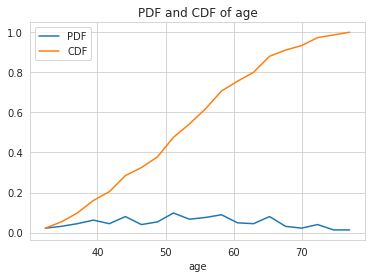

In [160]:
#Plot PDF and CDF of age
#PDF
counts, bins = np.histogram(status_yes['age'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bins)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)
plt.xlabel("age")
plt.legend(['PDF','CDF'])
plt.title('PDF and CDF of age')
plt.show()

The Probability density function of age and year is almost linear. Theyby it is doesn't give much information. 



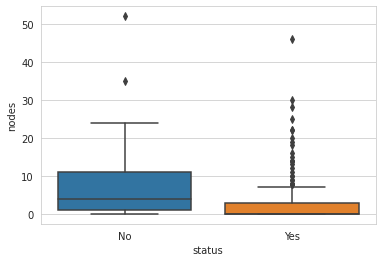

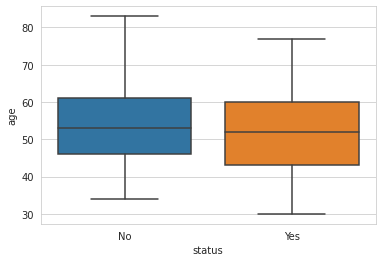

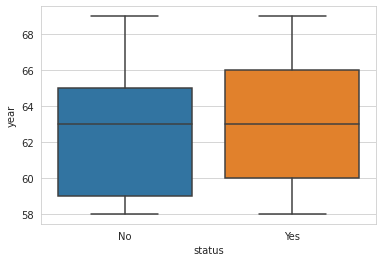

In [54]:
#Box Plot for the feature nodes
sns.boxplot(x = 'status', y ='nodes', data = data)
plt.show()

#Box Plot for the feature age
sns.boxplot(x = 'status',y = 'age', data = data)
plt.show()

#Box Plot for the feature year
sns.boxplot(x = 'status', y = 'year', data = data)
plt.show()

In [ ]:
print('\n The Medians are:')
print(np.median(status_yes['nodes']))
print(np.median(status_no['nodes']))
print('\n The qunatiles are:')
print(np.percentile(status_yes['nodes']),np.arrange(0,100,25))
print(np.percentile(status_no['nodes']),np.arrange(0,100,25))
print('\n The 95th percentile is:')
print(np.percentile(status_yes['nodes']),95)
print(np.percentile(status_no['nodes']),95)

The box plots of age and year have almost overlaps with the survived and unsurvived patients and it is not a good feature to interpert the results. But 75% of survived patients have 

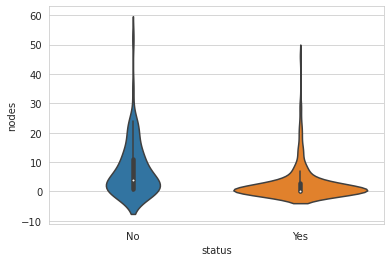

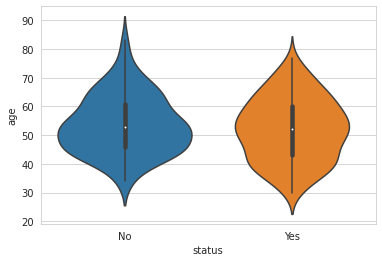

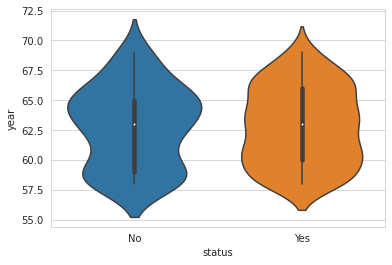

In [84]:
sns.violinplot(x = 'status', y ='nodes', data = data)
plt.show()

#Box Plot for the feature age
sns.violinplot(x = 'status',y = 'age', data = data)
plt.show()

#Box Plot for the feature year
sns.violinplot(x = 'status', y = 'year', data = data)
plt.show()

##Bi-variate analysis of the feature

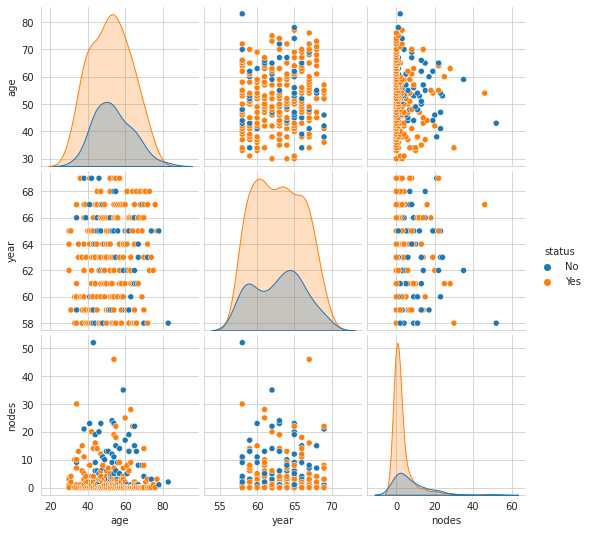

In [56]:
#Plotting a pair plot
sns.pairplot(data, hue= "status")
plt.show()

            age      year     nodes
age    1.000000  0.089529 -0.063176
year   0.089529  1.000000 -0.003764
nodes -0.063176 -0.003764  1.000000


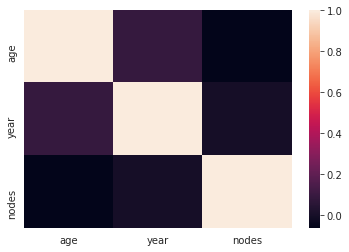

In [157]:
#Correlation matrix of interger variables
corr=data.loc[:,data.dtypes=='int64'].corr()
print(corr)
sns.heatmap(corr)

It is very clear that there is no correlation between the features, each and every feature is unqiue,as their correlation values are alomst near to zero, apart from the its own feature. 

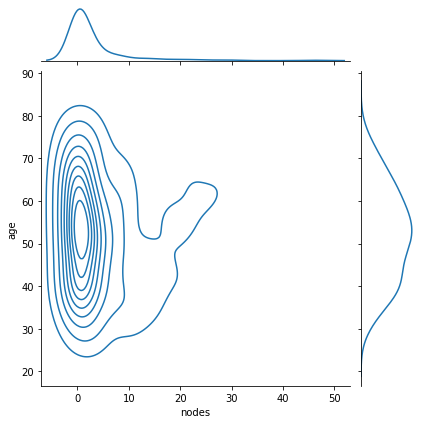

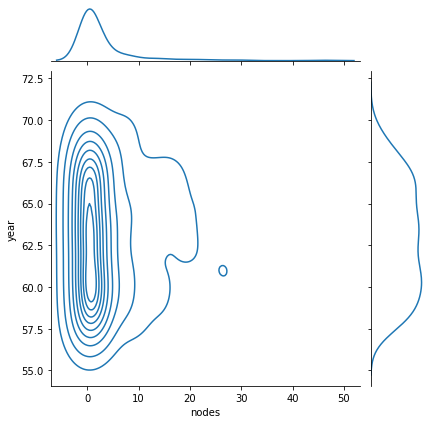

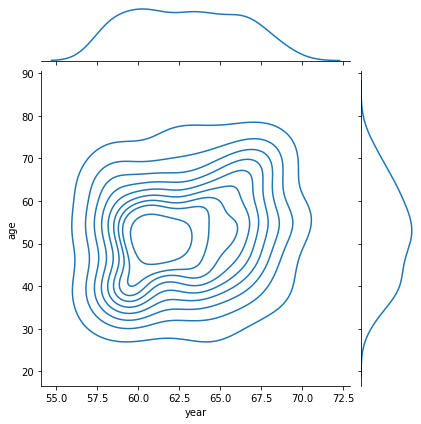

In [10]:
#Counterplot for the feature nodes,age
sns.jointplot(x = 'nodes', y ='age', data = status_yes, kind='kde')
plt.show()

#Counterplot for the feature nodes,year
sns.jointplot(x = 'nodes',y = 'year', data = status_yes, kind='kde')
plt.show()

##Counterplot for the feature year,age
sns.jointplot(x = 'year', y = 'age', data = status_yes, kind='kde')
plt.show()


1.Above is the 2D density plot for long survival using features age and  nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3.

2.It is somewhat possible for us to classify the patients. From the Age vs Year plot we can make out that most patients who were operated between year 1960 and 1963 and aged 47 to 52 and has the highest rate of survival.

 

